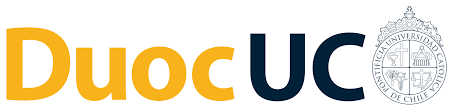

# Mineria de Datos
*   Seccion: 003D
*   Profesor: Gabriel Estivales
*   Integrantes:
*   Martin Elgueta **RUT**: 21.178.901-8
*   Maximiliano Valdés **RUT**: 21.173.301-2



# Fase 1: Entendimiento del negocio

## Modelo de trabajo:
Este trabajo se desarrollara en base a las primeras tres fases del modelo de trabajo Crisp-dm, entendimiento del negocio, entendimiento de los datos, preparacion de los datos y modelado.
## Contexto:
Se nos entrega un dataset el cual consiste de informacion climatologica de Australia, y gracias al caso que se nos plantea podemos afirmar que Australia es un pais principalmente arido. Por otro lado tambien se nos plantea que este consta de diversos climas puesto que al ser un pais muy extenso puede llegar a tener mucha variabilidad de una zona a otra.
## Proposito:
El principal proposito de este trabajo es el poder reconocer el clima del dia y del dia siguiente en base a las variables que se nos entregan y poder definir si llueve o no.

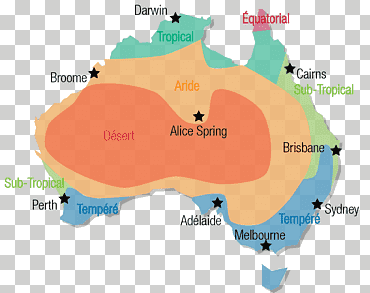

Importamos las librerias que utilizaremos a lo largo del trabajo, de ser necesarias otras las ingresaremos en su respectivo momento, pero estas al ser las principales en el uso de la mineria de datos son las que importamos primero

# Fase 2: Entendimiento de los datos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Acontinuacion ingresaremos el dataframe para poder trabajar con el.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")
df.head(10)

Saving weatherAUS.csv to weatherAUS.csv


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


Gracias al contexto y al caso que se nos plantea (y a la tabla al final del caso), podmos saber que significa cada variable y que es lo que nos quiere respresentar en cada dato. En nuestro caso las variables objetivos son RainToday y RainTomorrow, la cuales se refieren a lluvia hoy y lluvia mañana respectivamente.

## Descripcion de variables:
* **Fecha:** Fecha de la observación
* **Ubicacion:** Ubicación de la estación meteorológica
***MinTemp:** Temperatura mínima en grados Celsius
***MaxTemp:** Temperatura máxima en grados Celsius
***Lluvia:** Cantidad de lluvia registrada ese día en mm.
***Evaporacion:** Evaporación (mm) en 24 horas
***Sol Número:** de horas de sol brillante en el día
***DirRafaga:** Dirección de la ráfaga de viento más fuerte en 24 horas.
***VelRafaga:** Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.
***Dir9am:** Dirección del viento a las 9am
***Dir3pm:** Dirección del viento a las 3pm
***Vel9am:** Velocidad (km/hr) del viento a las 9am
***Vel3pm:** Velocidad (km/hr) del viento a las 3pm
***Hum9am:** Porcentaje de humedad a las 9am
***Hum3pm:** Porcentaje de humedad a las 3pm
***Pres9am:** Presión atmosférica (hpa) a nivel del mar a las 9am
***Pre3pm:** Presión atmosférica (hpa) a nivel del mar a las 3pm
***Nub9am:** Fracción del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente
cubierto.
***Nub3pm:**
Fracción del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de
manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente
cubierto.
***Temp9am:** Temperatura en grados Celsius a las 9am
***Temp3pm:** Temperatura en grados Celsius a las 3pm
***LluviaHoy:**
Variable indicadora que toma el valor 1 si la precipitación es en mm. en las
últimas 24 hrs. excede 1 mm. y 0 si no.
***RISK_MM:** La cantidad de lluvia. Una especie de medida del "riesgo".
***LluviaMan:** Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.

## .info
Con el siguiente codigo podemos apreciar el tipo de dato que compone la columna y cuantos cuenta en cada una.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Como se puede apreciar hay datos, como fecha y rain today y rain tomorrow que son de tipo objectm los cuales deben ser modificados ya que intuitivamente y para el analisis de estos, este tipo de dato no son ideales

## .describe()
Nos aporta informacion como la media, el promedio, y los rangos intercuarles de cada variable de tipo numerica

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


## Mapa de calor
A continuacion podemos apreciar la correlacion que existe en cada una de las variables para poder detectar si son dependientes unas de otras o si tienen una relacion inversa, mientras mas azul mas inversa es y mientras mas roja mas relacion existe entre una y otra.

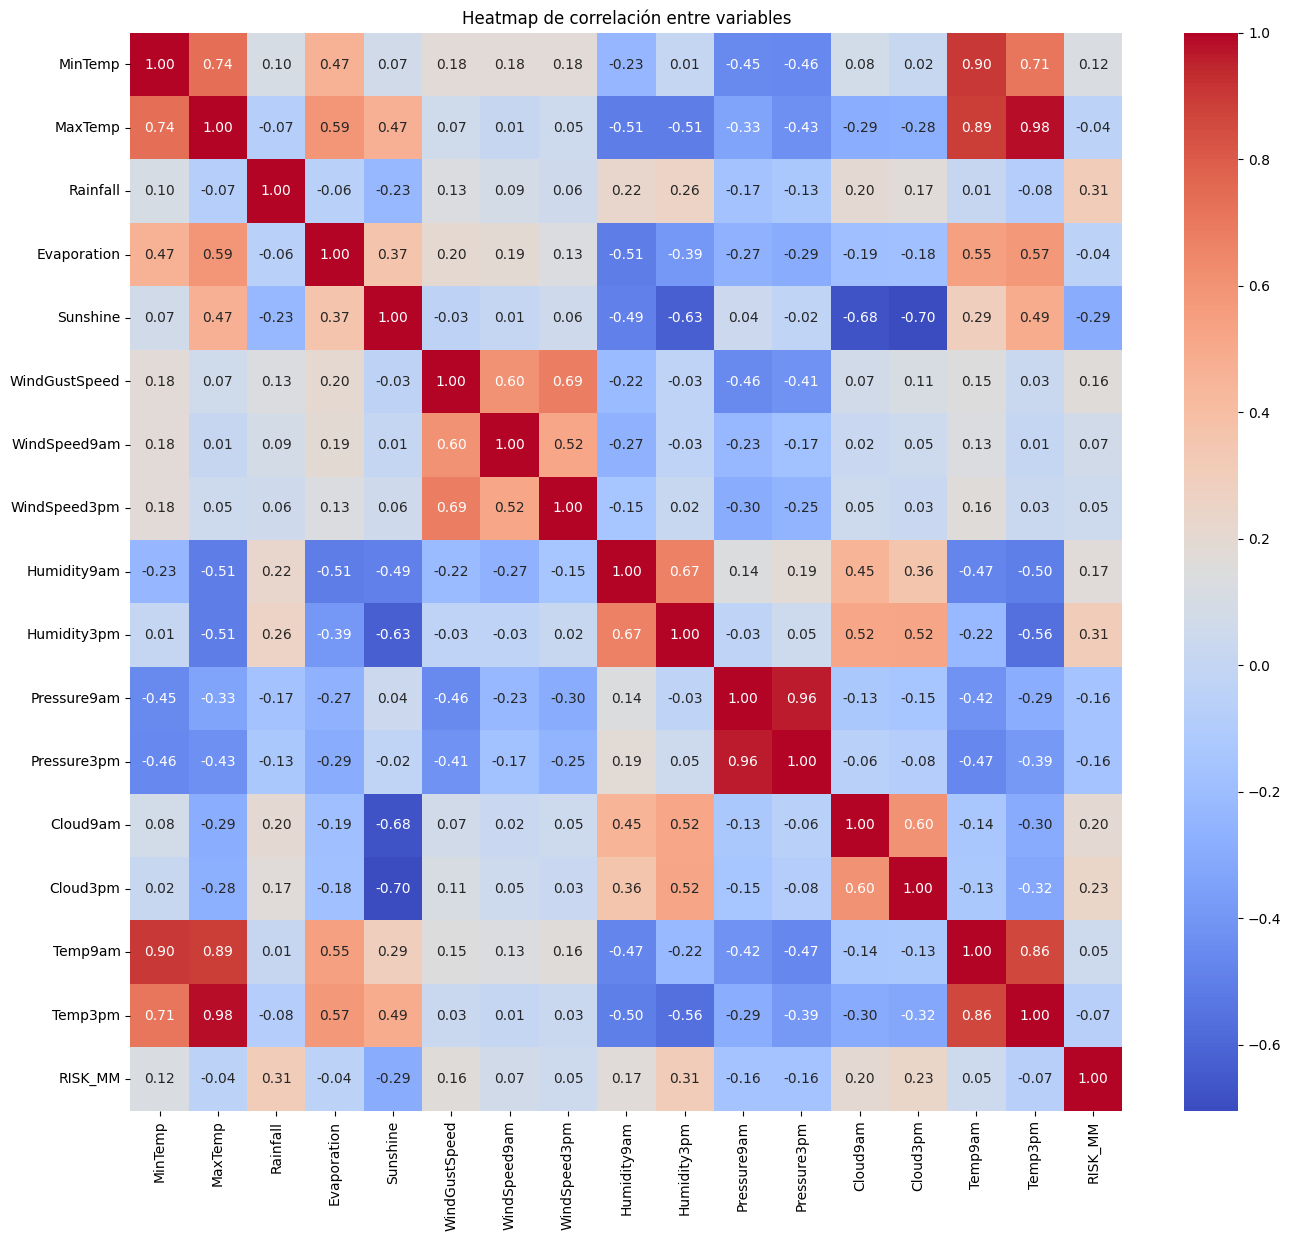

In [ ]:
numeric_variables = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                          'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                          'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                          'Temp9am', 'Temp3pm', 'RISK_MM']]

# Calcula la matriz de correlación
correlation_matrix = numeric_variables.corr()

# Crea el mapa de calor
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de correlación entre variables')
plt.show()


## Temperaturas maximas y minimas registradas

In [ ]:
valor_maximo = df['Temp3pm'].max()
valor_minimo = df['Temp9am'].min()

print(f"Temperatura maxima registrada: {valor_maximo}")
print(f"Temperatura minima registrada: {valor_minimo}")

Temperatura maxima registrada: 46.7
Temperatura minima registrada: -7.2


Como se puede apreciar en el contexto y el resultado del codigo, podemos apreciar en el resultado que las temperaturas del pais son muy distintas por lo que las probabilidades de lluvia igual pueden variar de region a region

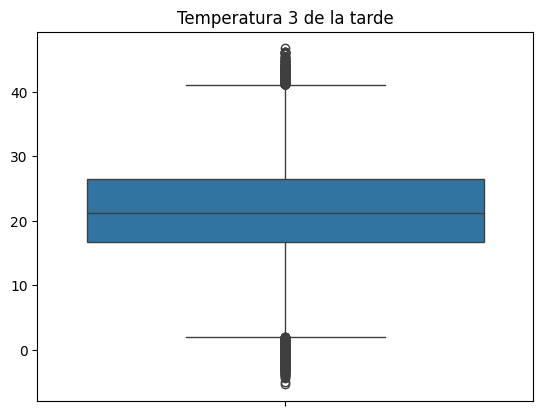

In [ ]:
# Gráfico de cajas de
sns.boxplot(list(df['Temp3pm']))
plt.title('Temperatura 3 de la tarde')
plt.show()

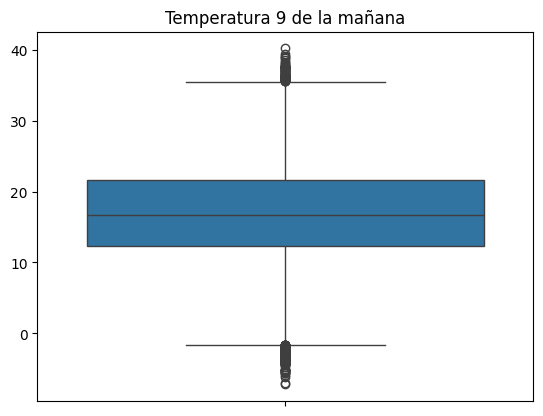

In [ ]:
# Gráfico de cajas de
sns.boxplot(list(df['Temp9am']))
plt.title('Temperatura 9 de la mañana')
plt.show()

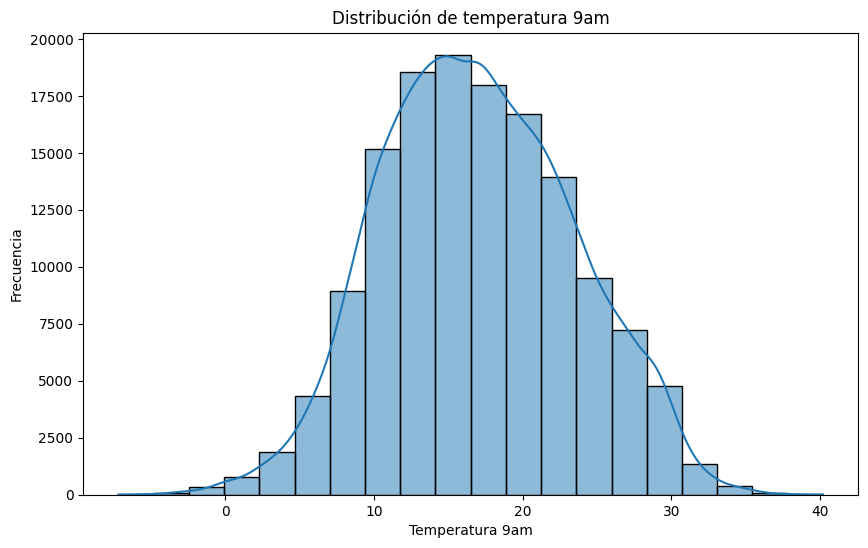

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temp9am'], bins=20, kde=True)
plt.xlabel('Temperatura 9am')
plt.ylabel('Frecuencia')
plt.title('Distribución de temperatura 9am')
plt.show()

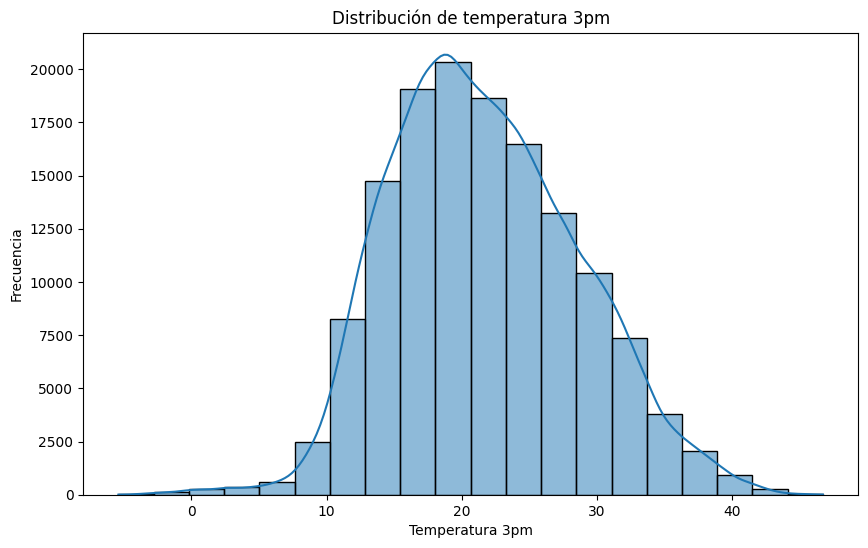

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temp3pm'], bins=20, kde=True)
plt.xlabel('Temperatura 3pm')
plt.ylabel('Frecuencia')
plt.title('Distribución de temperatura 3pm')
plt.show()

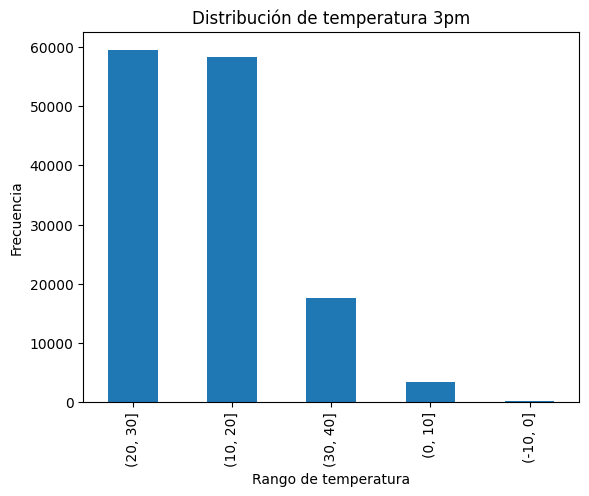

In [ ]:
# Agrupando la temperatura por rango de a 10
rango_edades = pd.cut(df['Temp3pm'], range(-10, 50, 10))
pd.value_counts(rango_edades).plot(kind='bar', title='Distribución de temperatura 3pm')
plt.xlabel('Rango de temperatura')
plt.ylabel('Frecuencia')
plt.show()

Como se pudo apreciar desde el primer boxplot hasta el quinto grafico, las variables de temperatura tienen una distribucion normal.

# Fase 3: Preparacion de los datos.

A continuacion vamos a preparar los datos para poder trabajar de mejor manera en los modelos, puesto que los datos estan cambiados en el tipo de variable, por lo que remplazamos date por datetime ya que estaba en object, y tambien arreglamos las variables a numericas en las que son necesarias.

In [ ]:
# Conversión de la columna Date al tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Transformar las columnas categóricas a variables numéricas
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for column in categorical_columns:
    df[column] = df[column].astype('category').cat.codes

# Verificar la transformación
data_head_transformed = df.head()
data_info_transformed = df.info()

data_head_transformed, data_info_transformed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    142193 non-null  int8          
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     142193 non-null  int8          
 10  WindDir3pm     142193 non-null  int8          
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

(        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
 1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
 2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
 3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
 4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
 
    WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
 0           13           44.0          13  ...         22.0       1007.7   
 1           14           44.0           6  ...         25.0       1010.6   
 2           15           46.0          13  ...         30.0       1007.6   
 3            4           24.0           9  ...         16.0       1017.6   
 4           13           41.0           1  ...         33.0       1010.8   
 
    Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_M

Tomamos la decision de remplazar los valores faltantes por la media ya que de esta forma no alteraran la distribucion de manera que los datos que estan registrados y son utilizables sean los primordiales a la hora de trabajar.

In [ ]:
# Rellenar los valores nulos en las columnas numéricas con la mediana de cada columna
numeric_columns = df.select_dtypes(include=['float64']).columns
for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Verificar que no queden valores nulos
missing_values_post_fill = df.isnull().sum()

missing_values_post_fill


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

Comprobamos que no existan nulos.

In [ ]:
df.isnull().any().any()

False

Realizamos un nuevo mapa de calor con las variables que fueron modificadas y asi podemos ver la relacion en todas estas categorias.

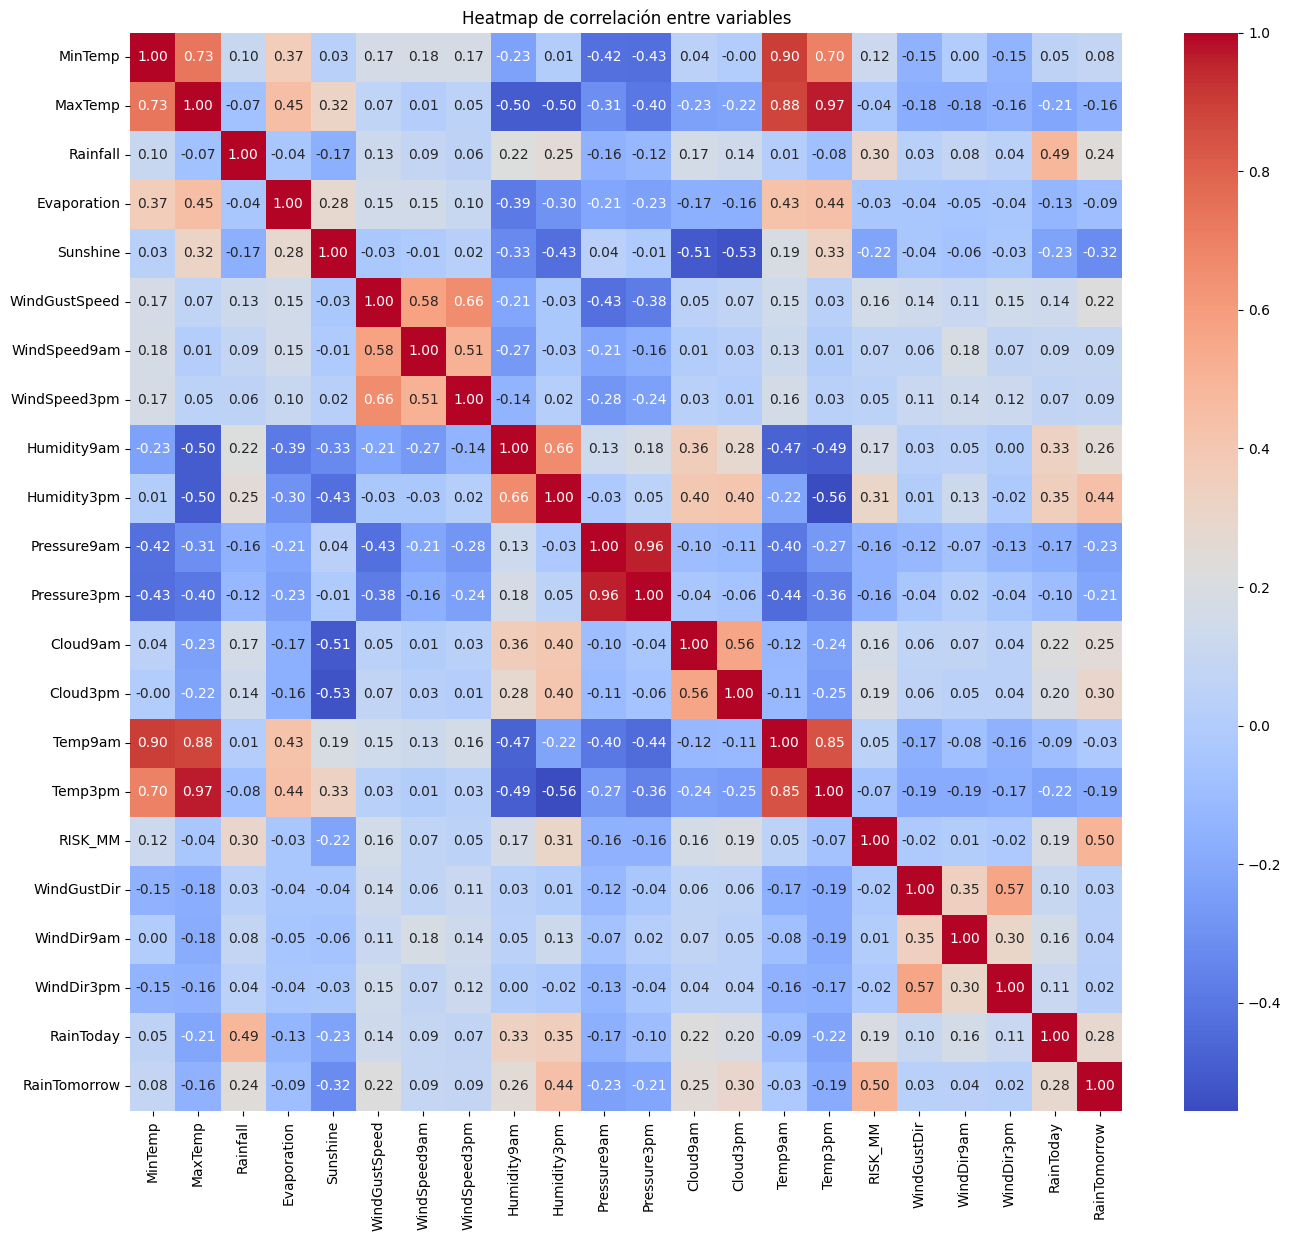

In [ ]:
numeric_variables = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]

correlation_matrix = numeric_variables.corr()

plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de correlación entre variables')
plt.show()

Verificamos la distribucion de las variables llueve hoy y llueve mañana

In [ ]:
# Verificar la distribución de valores en RainToday y RainTomorrow
print(df['RainToday'].value_counts())
print(df['RainTomorrow'].value_counts())

RainToday
 0    109332
 1     31455
-1      1406
Name: count, dtype: int64
RainTomorrow
0    110316
1     31877
Name: count, dtype: int64


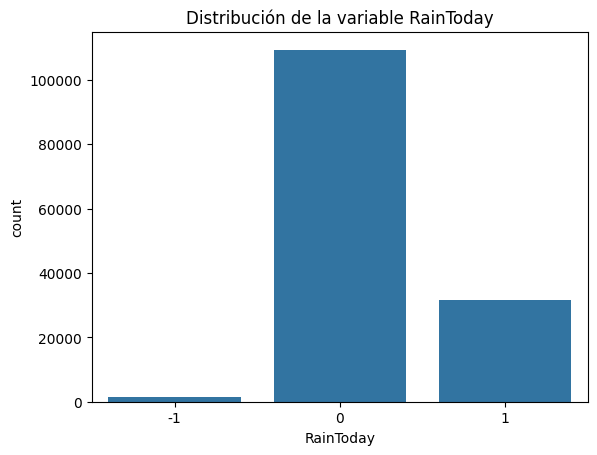

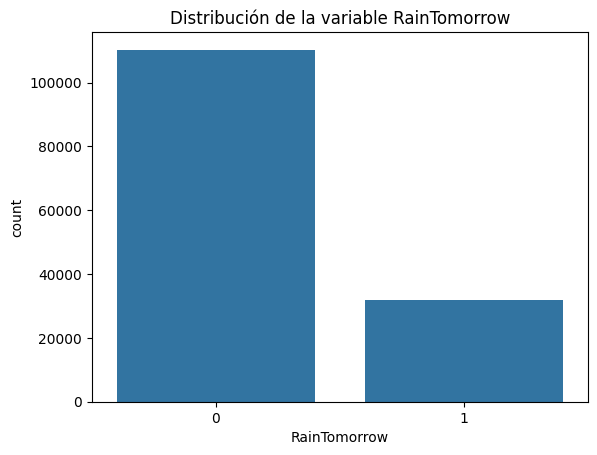

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la distribución de las clases
sns.countplot(x='RainToday', data=df)
plt.title('Distribución de la variable RainToday')
plt.show()

sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribución de la variable RainTomorrow')
plt.show()

Al ver que la distribucion de llueve hoy tiene un valor de -1, lo cual no deberia, y que se puede deber a que existian valores incorrectos, tomamos la decicion de corregirlo y remplazarlos por 0.

In [ ]:
df['RainToday'].replace(-1, 0, inplace=True)

print(df['RainToday'].value_counts())

RainToday
0    110738
1     31455
Name: count, dtype: int64


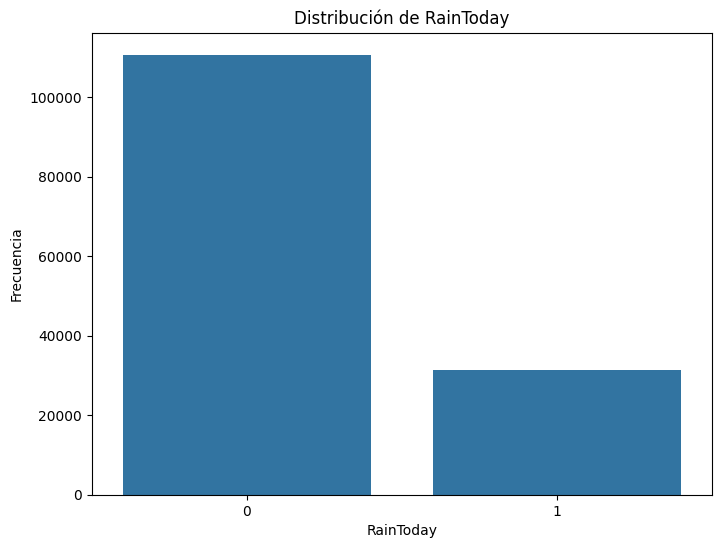

In [ ]:
RainToday_counts = df['RainToday'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=RainToday_counts.index, y=RainToday_counts.values)
plt.title('Distribución de RainToday')
plt.xlabel('RainToday')
plt.ylabel('Frecuencia')
plt.show()

# Fase 4: Modelamiento

A continuacion empezaremos con el modelamiento, definimos los valores de entrenamiento y prueba, decidimos que lo ideal es que los valores de entrenamiento cuenten con el 70% de los datos ya que al ser un data set relativamente grande el 70% tambien lo seria, ademas de ser este unos de los grandes estandares de la industria al separar los datos entre entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y las etiquetas (y)
X = df.drop(columns=['Date', 'Location', 'RainToday', 'RainTomorrow'])
y_today = df['RainToday']
y_tomorrow = df['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_today, X_test_today, y_train_today, y_test_today = train_test_split(X, y_today, test_size=0.3, random_state=42)
X_train_tomorrow, X_test_tomorrow, y_train_tomorrow, y_test_tomorrow = train_test_split(X, y_tomorrow, test_size=0.3, random_state=42)

A continuacion procesamos un arbol de decision como primer modelo dee clasificacion.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modelo para predecir si lloverá hoy
model_today = DecisionTreeClassifier(random_state=42)
model_today.fit(X_train_today, y_train_today)

# Modelo para predecir si lloverá mañana
model_tomorrow = DecisionTreeClassifier(random_state=42)
model_tomorrow.fit(X_train_tomorrow, y_train_tomorrow)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluación del modelo para hoy
y_pred_today = model_today.predict(X_test_today)
print("Precision para RainToday:", accuracy_score(y_test_today, y_pred_today))
print(classification_report(y_test_today, y_pred_today))

# Evaluación del modelo para mañana
y_pred_tomorrow = model_tomorrow.predict(X_test_tomorrow)
print("Precision para RainTomorrow:", accuracy_score(y_test_tomorrow, y_pred_tomorrow))
print(classification_report(y_test_tomorrow, y_pred_tomorrow))

Precision para RainToday: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33285
           1       1.00      1.00      1.00      9373

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658

Precision para RainTomorrow: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33133
           1       1.00      1.00      1.00      9525

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



Al evaluarlo nos damos cuenta que es extremadamente preciso, lo que puede significar que existen variables que fugan informacion clave en la toma de deciciones, por lo que a continuacion buscamos si alguna columna de x contiene informacion directa de raintoday o tomorrow.

In [ ]:
columns_with_target_info = [col for col in X.columns if 'Rain' in col or 'Tomorrow' in col or 'Today' in col]
columns_with_target_info

['Rainfall']

A continuacion agregamos la columna rainfall a las columnas que no debe tomar en cuenta X y repetimos el proceso anterior del modelo.

In [ ]:
# Excluir la columna Rainfall del conjunto de características
X = df.drop(columns=['Date', 'Location', 'RainToday', 'RainTomorrow', 'Rainfall'])

# Volver a dividir los datos en conjuntos de entrenamiento y prueba
X_train_today, X_test_today, y_train_today, y_test_today = train_test_split(X, y_today, test_size=0.3, random_state=42)
X_train_tomorrow, X_test_tomorrow, y_train_tomorrow, y_test_tomorrow = train_test_split(X, y_tomorrow, test_size=0.3, random_state=42)

# Entrenar los modelos
model_today.fit(X_train_today, y_train_today)
model_tomorrow.fit(X_train_tomorrow, y_train_tomorrow)

# Evaluar los modelos
y_pred_today = model_today.predict(X_test_today)
print("Precision para RainToday:", accuracy_score(y_test_today, y_pred_today))
print(classification_report(y_test_today, y_pred_today))

y_pred_tomorrow = model_tomorrow.predict(X_test_tomorrow)
print("Precision para RainTomorrow:", accuracy_score(y_test_tomorrow, y_pred_tomorrow))
print(classification_report(y_test_tomorrow, y_pred_tomorrow))

Precision para RainToday: 0.7825964649069342
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     33285
           1       0.51      0.53      0.51      9373

    accuracy                           0.78     42658
   macro avg       0.68      0.69      0.69     42658
weighted avg       0.79      0.78      0.78     42658

Precision para RainTomorrow: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33133
           1       1.00      1.00      1.00      9525

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



Como el modelo nuevamente dio error, pero esta vez solamente en RainTomorrow, buscamos el porque de esto, por lo que tenemos que revisar que variables son las que estan siendo utilizadas en el modelo aparte de las que ya hemos eliminados.

In [ ]:
X = df.drop(columns=['Date', 'Location', 'RainToday', 'RainTomorrow', 'Rainfall'])
print(X.columns)

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')


Al ver las columnas usadas pensamos que RISK_MM puede ser la variable que esta filtrando informacion de mañana ya que como su nombre lo dice, es el riego que existe de milimetros de lluvia, por ende si esta variable llega tener un valor da informacion de que puede llover.

In [ ]:
# Excluir la columna RISK_MM del conjunto de características
X = df.drop(columns=['Date', 'Location', 'RainToday', 'RainTomorrow', 'Rainfall', 'RISK_MM'])

# Verificar las características utilizadas para entrenar el modelo
print(X.columns)

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


Agregamos esta exclucion al modelo y volvemos a repetir el proceso.

In [ ]:
X = df.drop(columns=['Date', 'Location', 'RainToday', 'RainTomorrow', 'Rainfall', 'RISK_MM'])

X_train_today, X_test_today, y_train_today, y_test_today = train_test_split(X, y_today, test_size=0.3, random_state=42)
X_train_tomorrow, X_test_tomorrow, y_train_tomorrow, y_test_tomorrow = train_test_split(X, y_tomorrow, test_size=0.3, random_state=42)

model_today.fit(X_train_today, y_train_today)
model_tomorrow.fit(X_train_tomorrow, y_train_tomorrow)

y_pred_today = model_today.predict(X_test_today)
print("Precision para RainToday:", accuracy_score(y_test_today, y_pred_today))
print(classification_report(y_test_today, y_pred_today))

y_pred_tomorrow = model_tomorrow.predict(X_test_tomorrow)
print("Precision para RainTomorrow:", accuracy_score(y_test_tomorrow, y_pred_tomorrow))
print(classification_report(y_test_tomorrow, y_pred_tomorrow))

Precision para RainToday: 0.7797599512400957
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     33285
           1       0.50      0.52      0.51      9373

    accuracy                           0.78     42658
   macro avg       0.68      0.69      0.68     42658
weighted avg       0.78      0.78      0.78     42658

Precision para RainTomorrow: 0.7813071405129167
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     33133
           1       0.51      0.53      0.52      9525

    accuracy                           0.78     42658
   macro avg       0.69      0.69      0.69     42658
weighted avg       0.78      0.78      0.78     42658



Al ver los resultados de la prediccion podemos apreciar que los valores de prediccion en 0 (no llueve), son de un resultado normal, ni muy alto ni muy bajo, pero en su contraparte 1 (llueve), tiene practicamente 50% de probabilidad de lluvia en ambos modelos, por lo que es practicamente tirar una moneda al aire para saber si la prediccion es correcta o no, por lo que no se puede esperar mucho de este modelo.

Normalizamos los datos para que esten en la misma escala y poder entrenarlos de mejor manera

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir nuevamente los datos normalizados en conjuntos de entrenamiento y prueba
X_train_today, X_test_today, y_train_today, y_test_today = train_test_split(X_scaled, y_today, test_size=0.3, random_state=42)
X_train_tomorrow, X_test_tomorrow, y_train_tomorrow, y_test_tomorrow = train_test_split(X_scaled, y_tomorrow, test_size=0.3, random_state=42)

Ahora a continuacion vamos a probar el modelo de regresion logistica y evaluar sus resultados, asi vemos la relacion entre las variables independientes y la variable dependiente (Llueve hoy y mañana)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Modelo de regresión logística para RainTomorrow
logistic_today = LogisticRegression(max_iter=1000, random_state=42)
logistic_today.fit(X_train_today, y_train_today)

# Modelo de regresión logística para RainTomorrow
logistic_tomorrow = LogisticRegression(max_iter=1000, random_state=42)
logistic_tomorrow.fit(X_train_tomorrow, y_train_tomorrow)

# Evaluación del modelo de regresión logística para RainTomorrow
y_pred_logistic_today = logistic_today.predict(X_test_today)
print("Accuracy para RainToday con regresión logística:", accuracy_score(y_test_today, y_pred_logistic_today))
print(classification_report(y_test_today, y_pred_logistic_today))

# Evaluación del modelo de regresión logística para RainTomorrow
y_pred_logistic_tomorrow = logistic_tomorrow.predict(X_test_tomorrow)
print("Accuracy para RainTomorrow con regresión logística:", accuracy_score(y_test_tomorrow, y_pred_logistic_tomorrow))
print(classification_report(y_test_tomorrow, y_pred_logistic_tomorrow))

Accuracy para RainToday con regresión logística: 0.8333489615078062
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     33285
           1       0.68      0.46      0.55      9373

    accuracy                           0.83     42658
   macro avg       0.77      0.70      0.72     42658
weighted avg       0.82      0.83      0.82     42658

Accuracy para RainTomorrow con regresión logística: 0.8385531436072953
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     33133
           1       0.70      0.48      0.57      9525

    accuracy                           0.84     42658
   macro avg       0.78      0.71      0.74     42658
weighted avg       0.83      0.84      0.83     42658



Viendo los resultados que nos entrego la regresion logistica podemos decir que este modelo tiene buenas caracteristicas para ambos targets, pero por otro lado seguimos teniendo el problema para reconocer la variable 1, lo cual se puede deber a la diferencia de tamaño que hay entre los datos de 0 y 1.

Ahora probaremos el modelo de validacion cruzada con 5 partes

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para RainToday
scores_today = cross_val_score(logistic_tomorrow, X_scaled, y_today, cv=5)
print("Validación cruzada scores para RainToday:", scores_today)
print("Media validación cruzada score para RainToday:", scores_today.mean())

# Validación cruzada para RainTomorrow
scores_tomorrow = cross_val_score(logistic_tomorrow, X_scaled, y_tomorrow, cv=5)
print("Cross-validation scores para RainTomorrow:", scores_tomorrow)
print("Media cross-validation score para RainTomorrow:", scores_tomorrow.mean())

Validación cruzada scores para RainToday: [0.82671683 0.81022539 0.83329231 0.83711935 0.83764681]
Media validación cruzada score para RainToday: 0.829000139007405
Cross-validation scores para RainTomorrow: [0.83100672 0.81898098 0.84246985 0.84302694 0.84626204]
Media cross-validation score para RainTomorrow: 0.8363493040471152


Por los resultados entregados, este modelo es el mas estable para ambos targets, teniendo en promedio resultados de 0.83, lo cual puede ser un excelente desempeño ya que no estaria ni sobreajustando ni subajustando los modelos y que por ende generaliza de manera correcta.

Ahora como ultimo modelo, vamos a probar el super vector machine, el cual probaremos para entre lluvia para mañana.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Selección de características y variable objetivo
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
            'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
target = 'RainTomorrow'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = svm.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print(f'Precision: {accuracy}')
print('Reporte:')
print(reporte)

Precision: 0.8407801584696891
Reporte:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33133
           1       0.73      0.46      0.56      9525

    accuracy                           0.84     42658
   macro avg       0.79      0.71      0.73     42658
weighted avg       0.83      0.84      0.83     42658



El modelo tiene una precisión general alta (84%). Aunque el modelo es mucho mejor prediciendo días en que no llueve (0) que días en que sí llueve (1), como se refleja en las diferencias de recall (0.95 vs 0.46). Este tipo de modelo puede ser útil para predecir lluvia, pero puede necesitar ajustes para mejorar la predicción de los días lluviosos, lo cual podría implicar ajustar el modelo, balancear los datos, o probar con diferentes algoritmos o parámetros.

Ahora probaremos a utilizar el mismo modelo de super vector machine pero con un submuestro de la clase mayoritaria, para que asi ambas clases esten en igualdad de condiciones.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar submuestreo aleatorio a los datos de entrenamiento
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train_resampled)

# Realizar predicciones
y_pred = svm.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print(f'Precision: {accuracy}')
print('Reporte:')
print(reporte)

Precision: 0.7906371606732617
Reporte:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     33133
           1       0.52      0.76      0.62      9525

    accuracy                           0.79     42658
   macro avg       0.72      0.78      0.74     42658
weighted avg       0.83      0.79      0.80     42658



Como resultado nos entrega que la precision baja pero que el recall sube, lo que significa que puede que no este balanceando de manera correcta los datos.

# Conclusion:

Como conclusion podemos decir que dependiendo del contexto podemos elegir un modelo u otro, a que para modelos de prediccion de hoy puede ser mejor la regresion logistica, pero por otro lado la validacion cruzada puede ser de gran ayuda a la hora de predecir. Por otro lado, lo que es ideal a la hora de trabajar con estos modelos es el poder balancear los datos para que el entrenamiento sea el idoneo ya que en particular nuestro dataframe es muy desbalanceado.

#Visualizacion valores atipicos

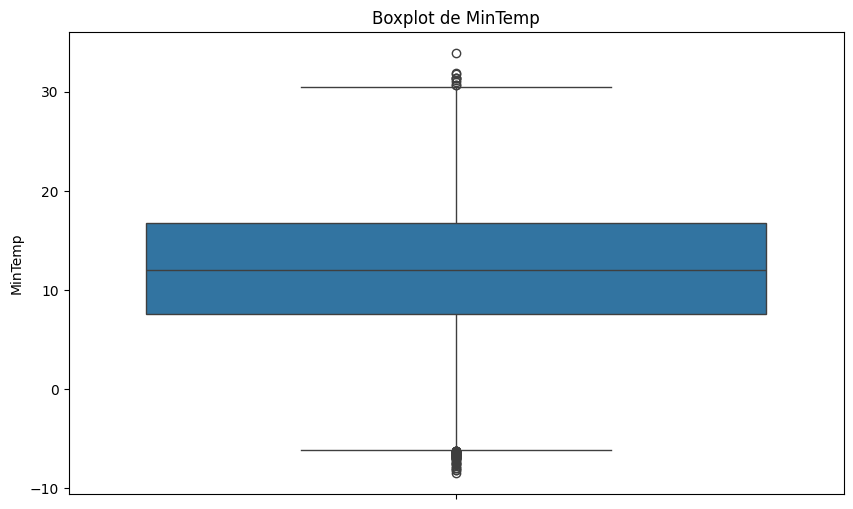

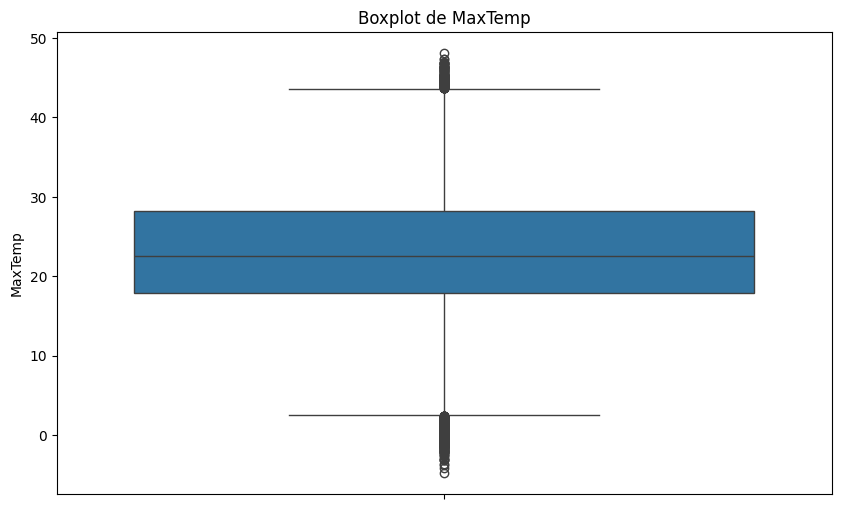

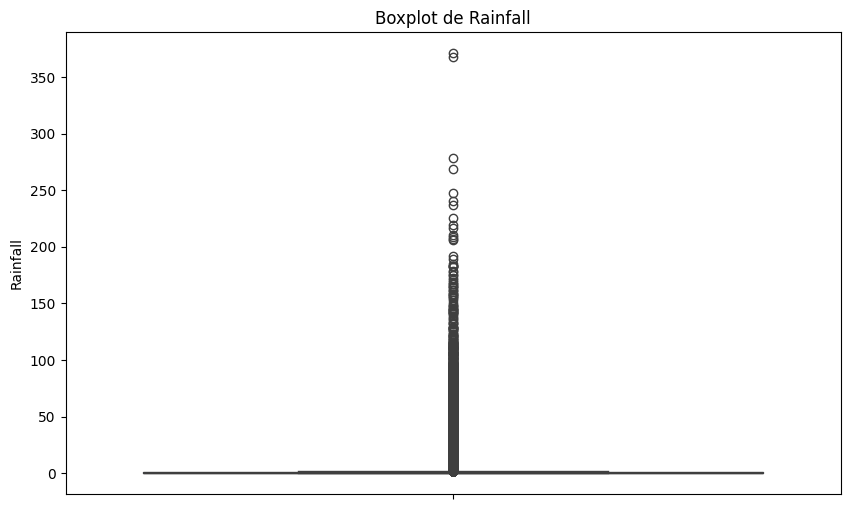

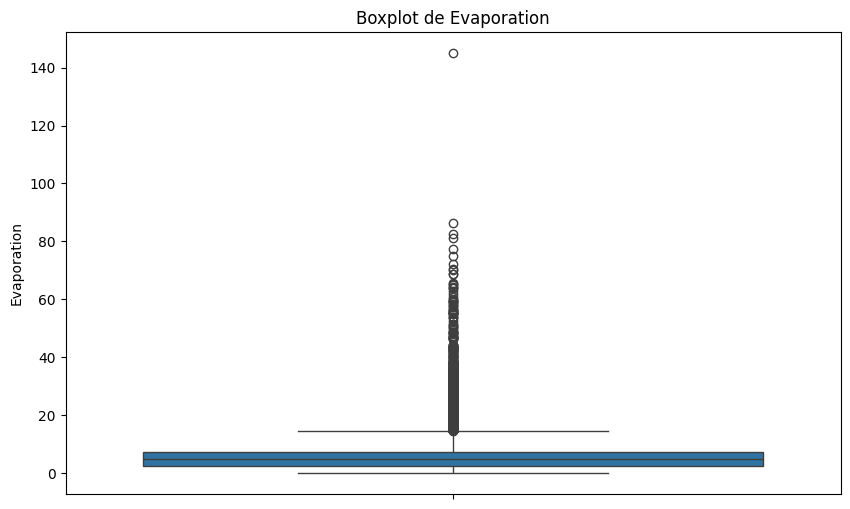

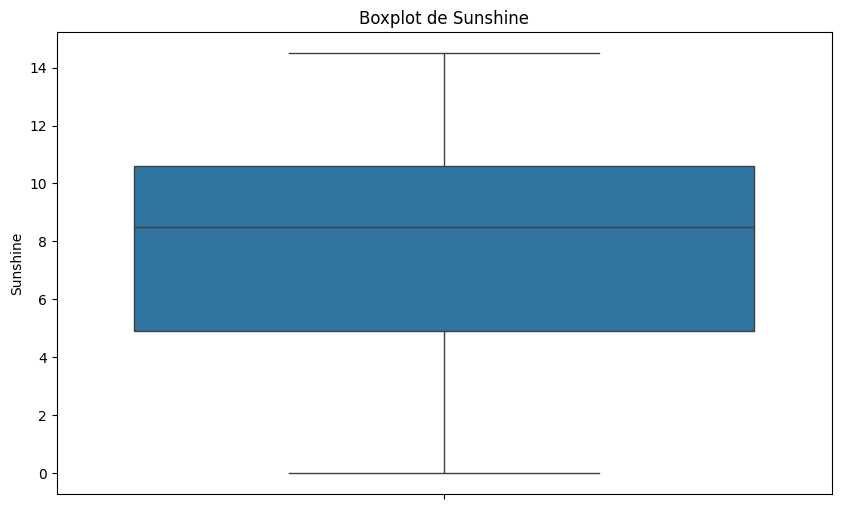

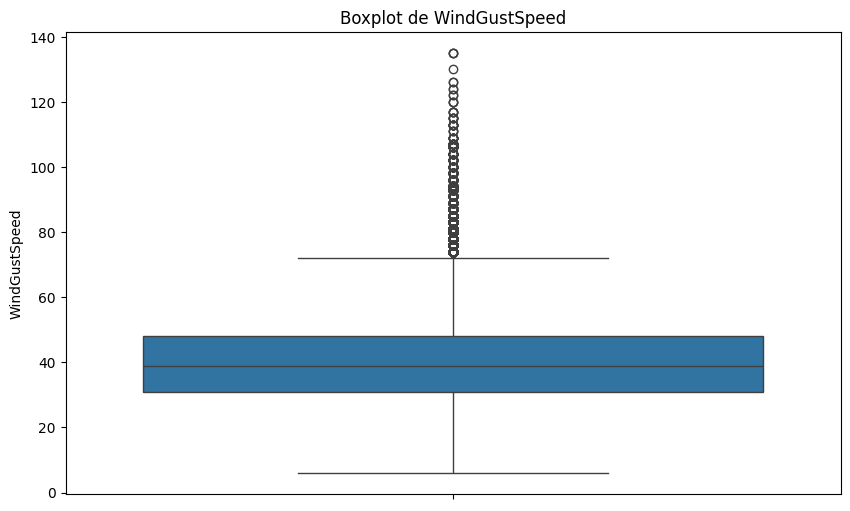

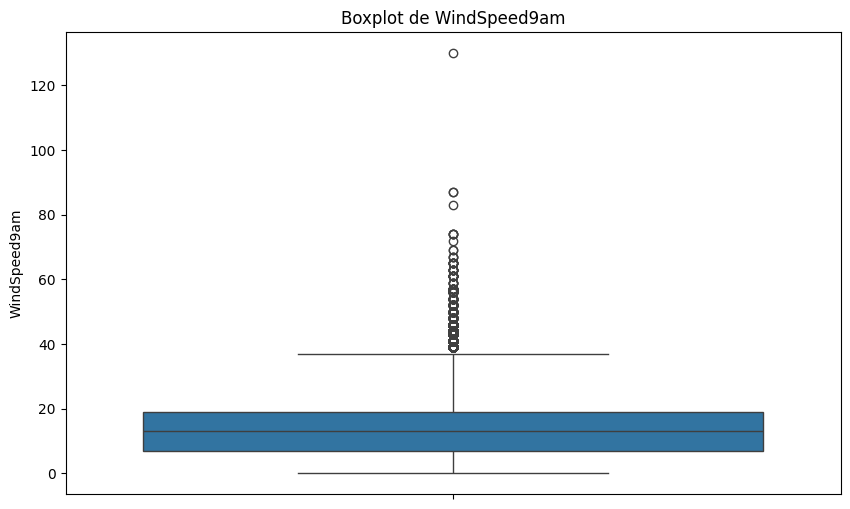

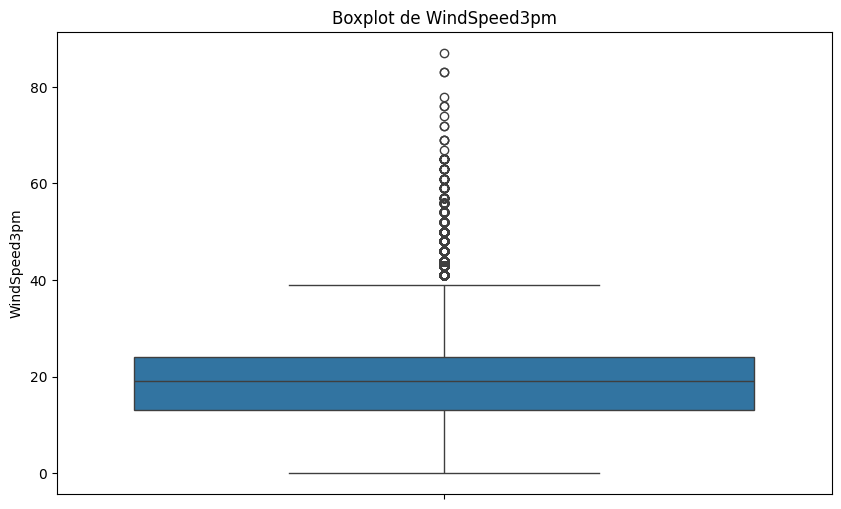

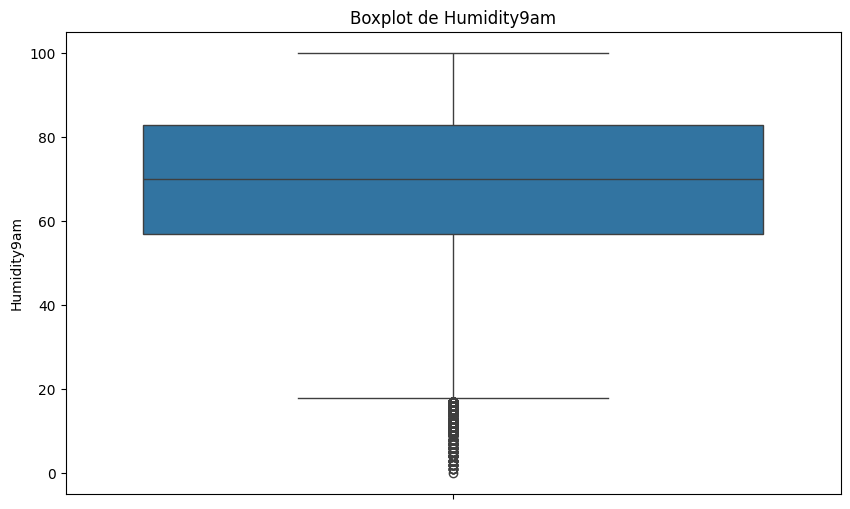

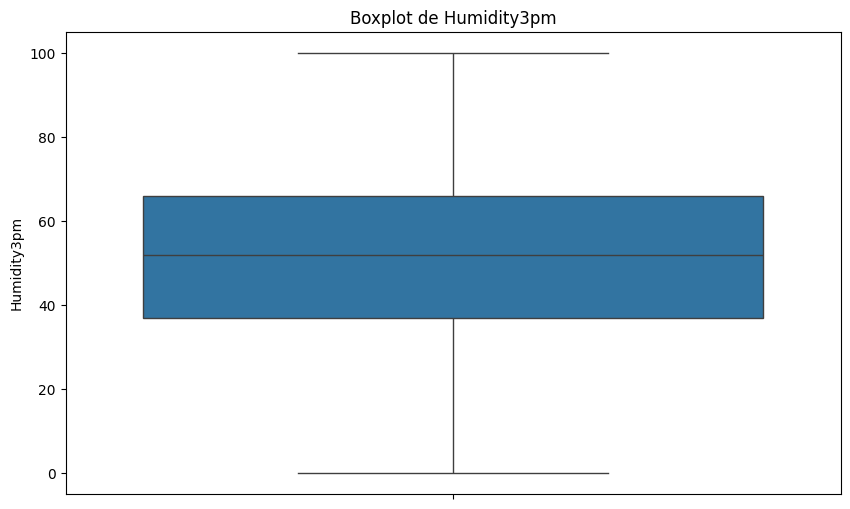

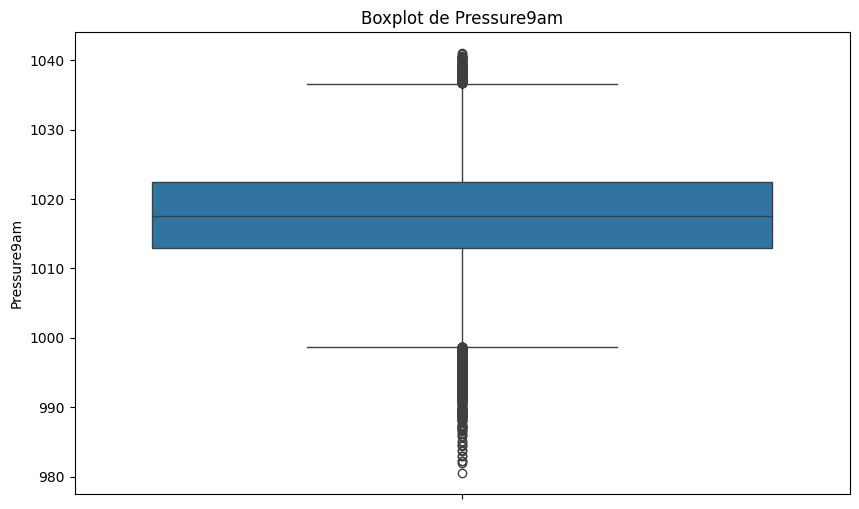

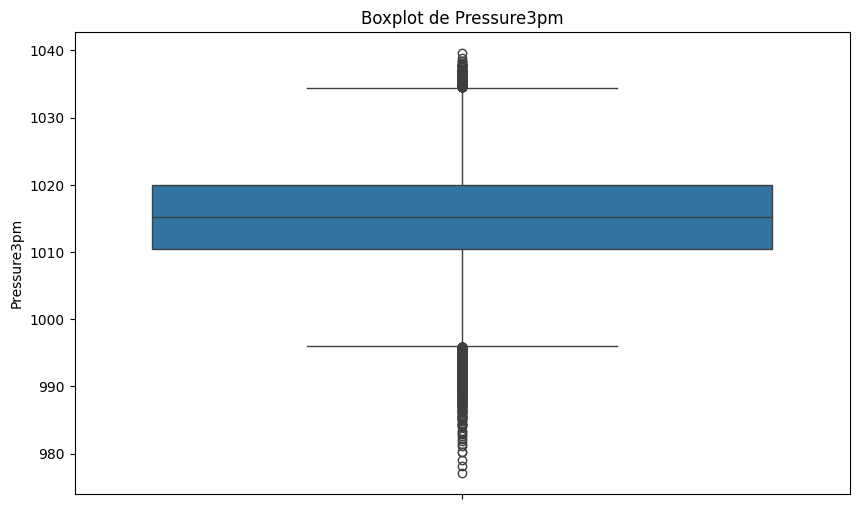

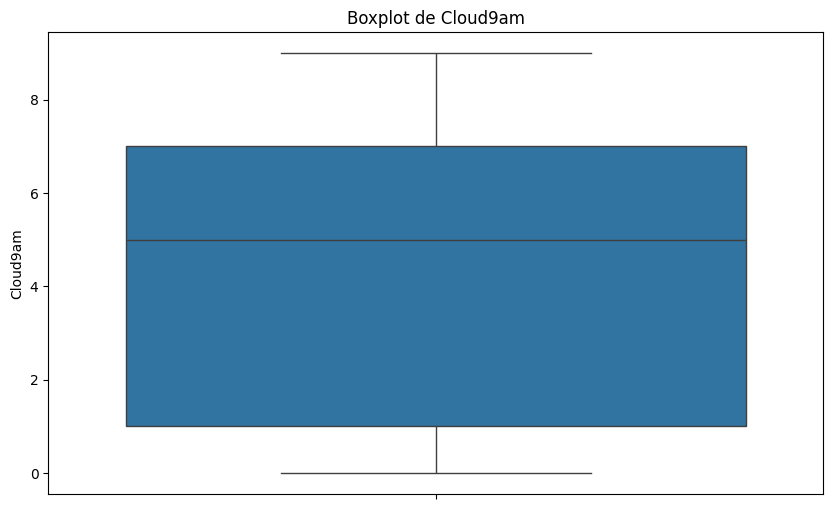

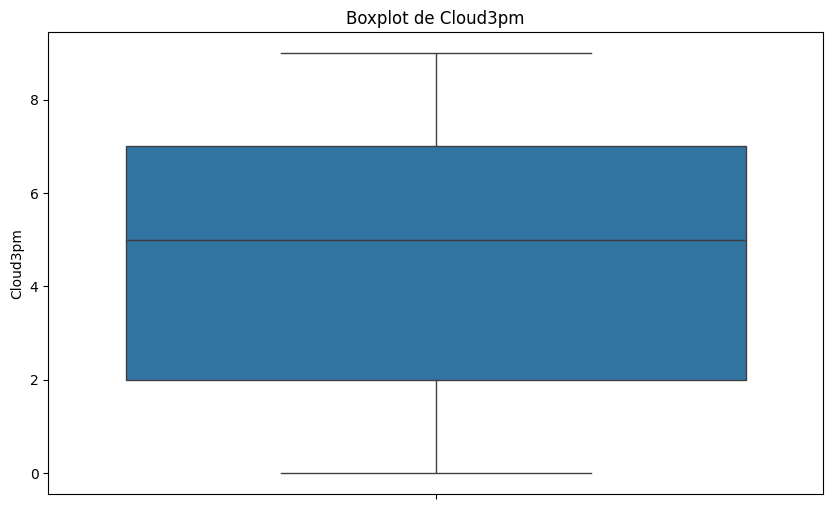

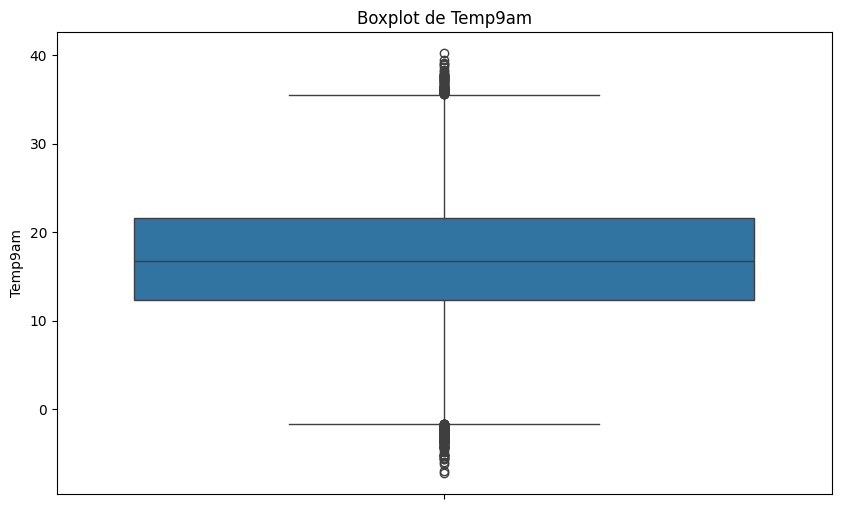

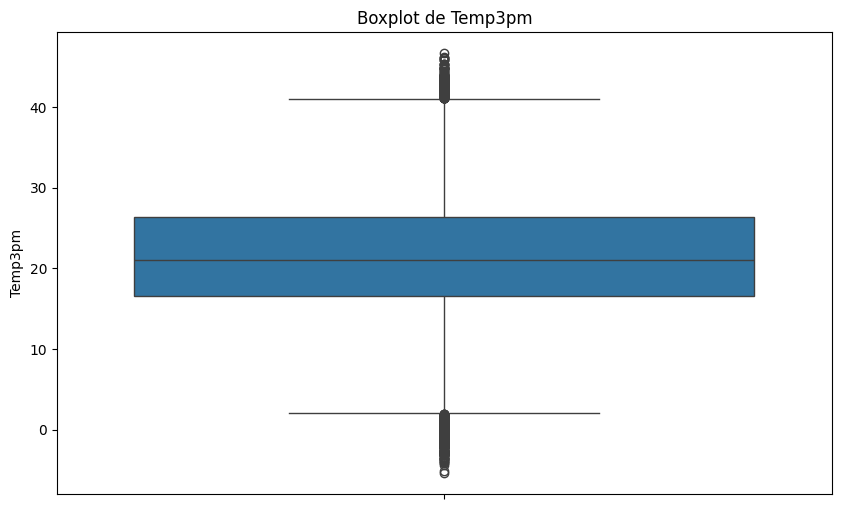

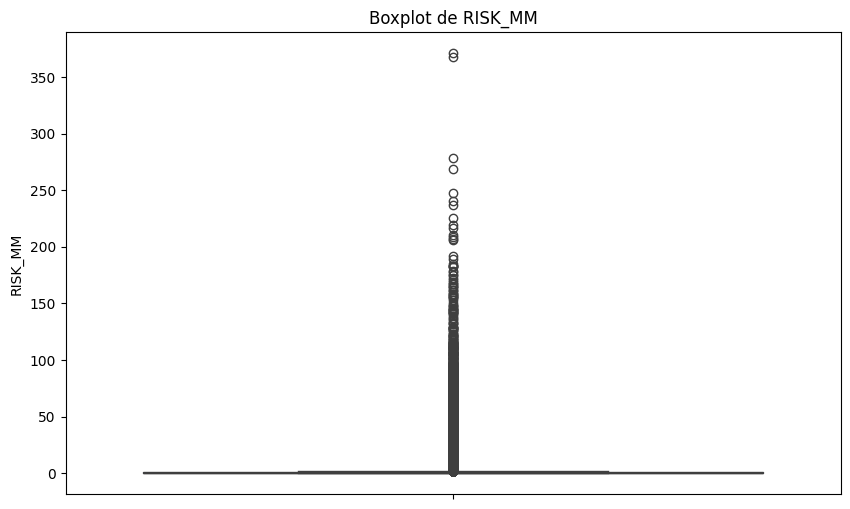

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/weatherAUS.csv'
df = pd.read_csv(file_path)

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear un boxplot para cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)
    plt.show()

Como se puede apreciar, se realizaron modelos de boxplot a todos las variables posibles que sean de tipo numerico, de esta forma se puede realizar un analisis para determinar los valores atipicos que esten fuera de los rangos intercuartilicos.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Function to perform predictive analysis for a given region
def analyze_region(region_name, data, features, target):
    region_data = data[data['Location'] == region_name]

    # Ensure all required columns are present
    for feature in features:
        if feature not in region_data.columns:
            region_data[feature] = np.nan

    # Check again if all features are present
    missing_features = set(features) - set(region_data.columns)
    if missing_features:
        print(f"Missing columns in region {region_name}: {missing_features}")
        return None

    # Impute missing values with the median
    imputer = SimpleImputer(strategy='median')
    imputed_data = imputer.fit_transform(region_data[features])

    # Convert the imputed array back to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=features, index=region_data.index)

    # Assign the imputed values to the original DataFrame
    for feature in features:
        region_data.loc[:, feature] = imputed_df[feature]

    # Prepare features and target
    X = region_data[features]
    y = region_data[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train an SVM model
    svm = SVC(kernel='linear')
    svm.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svm.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return region_name, accuracy, report

# Load the dataset
data = pd.read_csv('/content/weatherAUS.csv')  # Update this path if needed

# Features and target
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
            'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
target = 'RainTomorrow'

# Get the list of unique locations
locations = data['Location'].unique()

# Analyze each region and store the results
results = []
errors = []
for location in locations:
    try:
        result = analyze_region(location, data, features, target)
        if result:
            region_name, accuracy, report = result
            report_df = pd.DataFrame(report).transpose()
            report_df['Region'] = region_name
            report_df['Accuracy'] = accuracy
            results.append(report_df)
    except Exception as e:
        errors.append((location, str(e)))

# Combine results into a single DataFrame
results_df = pd.concat(results, ignore_index=True)

# Group by region and calculate mean metrics
mean_metrics = results_df.groupby('Region').mean().reset_index()

# Display the results
print("Resultados Exitosos:")
display(mean_metrics)

# Display errors
errors_df = pd.DataFrame(errors, columns=["Region", "Error"])
print("\nErrores Encontrados:")
display(errors_df)


Resultados Exitosos:


,Region,precision,recall,f1-score,support,Accuracy
0,AliceSprings,0.884530,0.784711,0.814574,546.189670,0.948352
1,Brisbane,0.813730,0.780601,0.792357,569.570285,0.851423
2,Cairns,0.786086,0.768193,0.774290,538.360981,0.804905
3,Canberra,0.865768,0.785740,0.808551,615.777583,0.887914
4,Cobar,0.884236,0.835289,0.854839,538.385953,0.929766
5,CoffsHarbour,0.772822,0.744089,0.751145,531.757788,0.788939
6,Darwin,0.845833,0.823588,0.832256,574.972234,0.861169
7,Hobart,0.803746,0.738617,0.751136,574.364472,0.822362
8,Melbourne,0.766271,0.724739,0.733294,438.759234,0.796170
9,MelbourneAirport,0.797087,0.763497,0.774952,541.968992,0.844961



Errores Encontrados:


,Region,Error
0,Albury,"Shape of passed values is (3011, 14), indices ..."
1,BadgerysCreek,"Shape of passed values is (2928, 12), indices ..."
2,Newcastle,"Shape of passed values is (2955, 11), indices ..."
3,NorahHead,"Shape of passed values is (2929, 12), indices ..."
4,Penrith,"Shape of passed values is (2964, 10), indices ..."
5,Richmond,"Shape of passed values is (2951, 15), indices ..."
6,Wollongong,"Shape of passed values is (2983, 14), indices ..."
7,Tuggeranong,"Shape of passed values is (2998, 12), indices ..."
8,MountGinini,"Shape of passed values is (2907, 10), indices ..."
9,Ballarat,"Shape of passed values is (3028, 14), indices ..."


Como se puede apreciar algunas regiones presentan fallas y errores, por lo que se deberan realizar modificaciones para poder realizar los modelos de super verctor machine en cada una de las regiones.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('/content/weatherAUS.csv')  # Update this path if needed

# Features and target
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
            'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
target = 'RainTomorrow'

# Ensure all required columns are present
for feature in features:
    if feature not in data.columns:
        data[feature] = np.nan

# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data[features])

# Convert the imputed array back to a DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=features)

# Replace original features with imputed features
data[features] = data_imputed_df[features]

# Function to perform predictive analysis for a given region
def analyze_region(region_name, data, features, target):
    region_data = data[data['Location'] == region_name].copy()

    # Check if the region has enough data
    if region_data.shape[0] < 10:  # Arbitrary threshold to skip very small regions
        print(f"Region {region_name} skipped due to insufficient data")
        return None

    # Prepare features and target
    X = region_data[features]
    y = region_data[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train an SVM model
    svm = SVC(kernel='linear')
    svm.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svm.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return region_name, accuracy, report

# Get the list of unique locations
locations = data['Location'].unique()

# Analyze each region and store the results
results = []
errors = []
for location in locations:
    try:
        result = analyze_region(location, data, features, target)
        if result:
            region_name, accuracy, report = result
            report_df = pd.DataFrame(report).transpose()
            report_df['Region'] = region_name
            report_df['Accuracy'] = accuracy
            results.append(report_df)
    except Exception as e:
        errors.append((location, str(e)))

# Check if there are results to concatenate
if results:
    # Combine results into a single DataFrame
    results_df = pd.concat(results, ignore_index=True)

    # Group by region and calculate mean metrics
    mean_metrics = results_df.groupby('Region').mean().reset_index()

    # Display the results
    print("Resultados Exitosos:")
    print(mean_metrics)
else:
    print("No hay resultados exitosos para mostrar.")

# Display errors
if errors:
    errors_df = pd.DataFrame(errors, columns=["Region", "Error"])
    print("\nErrores Encontrados:")
    print(errors_df)
else:
    print("No hay errores para mostrar.")


Resultados Exitosos:
              Region  precision    recall  f1-score     support  Accuracy
0           Adelaide   0.859513  0.823197  0.836861  556.376052  0.880259
1             Albany   0.790609  0.746084  0.755291  543.160221  0.801105
2             Albury   0.848002  0.807094  0.821545  542.574115  0.870575
3       AliceSprings   0.894378  0.800783  0.831224  546.190330  0.951648
4      BadgerysCreek   0.833568  0.775956  0.793396  527.573606  0.868032
5           Ballarat   0.821875  0.789757  0.800659  545.568537  0.842684
6            Bendigo   0.842394  0.783220  0.801601  546.774973  0.874863
7           Brisbane   0.816134  0.780349  0.792758  569.570495  0.852476
8             Cairns   0.789489  0.773462  0.779188  538.361650  0.808250
9           Canberra   0.858878  0.778742  0.800882  615.776803  0.884016
10             Cobar   0.864804  0.830344  0.844891  538.384615  0.923077
11      CoffsHarbour   0.782574  0.750344  0.758126  531.759142  0.795711
12          Dartm

Se realizaron modificaciones en las regiones, ya que al tener valores faltantes, los modelos no podian concluir, por lo que se tomo la decicion de realizar un KNN imputer y completarlas con los valores vecinos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

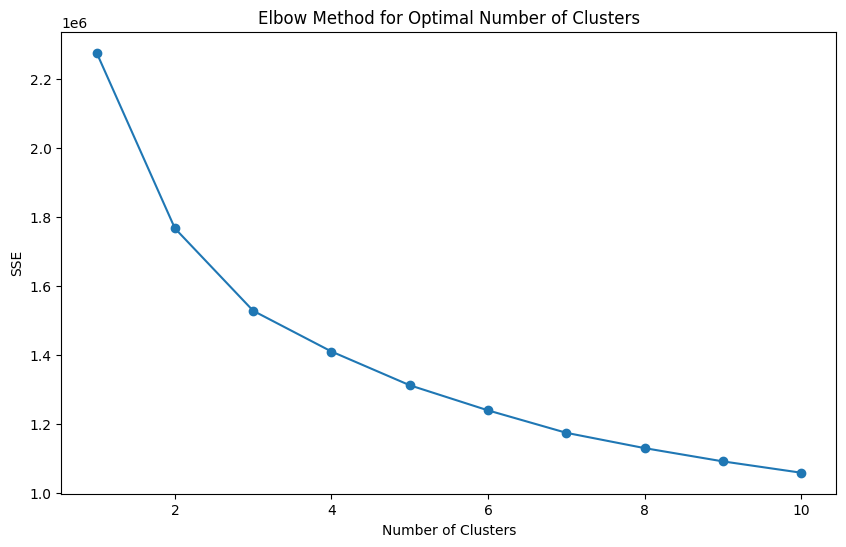

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


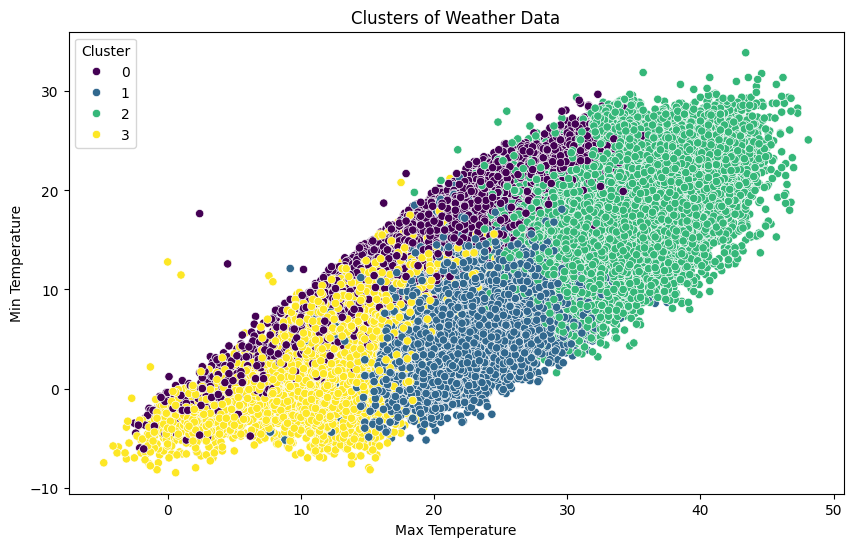

Cluster Centers:
     MinTemp    MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
0  14.022052  20.875453  7.346321     4.609189   5.274534      48.831287   
1  10.063725  22.860659  0.434254     4.878977   9.602548      36.672608   
2  18.289963  32.159960  0.621111     8.793575  10.293452      43.055559   
3   6.205328  16.021347  1.621710     2.650672   6.449529      30.796927   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0     18.840984     23.293565    77.846394    68.005210  1012.888880   
1     12.484013     17.238799    63.866547    43.335631  1020.467857   
2     15.429337     20.276262    53.377642    36.440439  1013.689863   
3      9.123481     13.376048    84.372948    62.604835  1023.980652   

   Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  
0  1011.506786  6.294621  6.229104  16.889859  19.000242  
1  1017.829188  2.465950  2.585398  15.871560  21.590475  
2  1010.615339  2.977745  3.212504  24.437643  30.280301  
3  10

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/weatherAUS.csv')  # Update this path if needed

# Features to be used for K-Means
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
            'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Ensure all required columns are present
for feature in features:
    if feature not in data.columns:
        data[feature] = np.nan

# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data[features])

# Convert the imputed array back to a DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=features)

# Replace original features with imputed features
data[features] = data_imputed_df[features]

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the SSE for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Based on the Elbow Method, let's choose k=4 for this example
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MaxTemp', y='MinTemp', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters of Weather Data')
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.show()

# Display the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:")
print(cluster_centers_df)


###Explicación del Código
####Selección de Columnas Numéricas: Selecciona solo las columnas numéricas del DataFrame.
####Función para Detectar y Visualizar Valores Atípicos:
####Calcula el rango intercuartil (IQR) para cada columna numérica.
####Define los límites inferior y superior para identificar los valores atípicos.
####Identifica los valores atípicos que están fuera de estos límites.
####Imprime los valores atípicos identificados.
####Crea un boxplot para visualizar los valores atípicos en cada columna.
###Buenas Prácticas
####Estadísticas Descriptivas: Utilizar medidas estadísticas como el IQR para identificar valores atípicos.
####Visualización: Utilizar gráficos como boxplots para visualizar los valores atípicos.
####Documentación y Transparencia: Documentar los pasos y las decisiones tomadas para tratar los valores atípicos.

#Búsqueda y Tratamiento de Valores Inexistentes

In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = '/content/weatherAUS.csv'
df = pd.read_csv(file_path)

# Mostrar el resumen inicial de valores nulos
print("Resumen inicial de valores nulos:")
print(df.isnull().sum())

# Rellenar los valores nulos en las columnas numéricas con la mediana de cada columna
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Rellenar los valores nulos en las columnas categóricas con el modo (valor más frecuente)
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Mostrar el resumen final de valores nulos para verificar que no queden valores nulos
print("Resumen final de valores nulos después del tratamiento:")
print(df.isnull().sum())

Resumen inicial de valores nulos:
Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64
Resumen final de valores nulos después del tratamiento:
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Clo

##Explicación del Código
####Resumen Inicial de Valores Nulos: Imprime un resumen inicial de los valores nulos en el DataFrame utilizando df.isnull().sum().
####Relleno de Valores Nulos en Columnas Numéricas: Rellena los valores nulos en las columnas numéricas con la mediana de cada columna.
####Relleno de Valores Nulos en Columnas Categóricas: Rellena los valores nulos en las columnas categóricas con el modo (valor más frecuente) de cada columna.
####Resumen Final de Valores Nulos: Imprime un resumen final de los valores nulos para verificar que no queden valores nulos después del tratamiento.
###Buenas Prácticas
####Detección de Valores Nulos: Utilizar métodos como isnull().sum() para detectar valores nulos.
####Tratamiento de Valores Nulos: Utilizar estrategias adecuadas para rellenar los valores nulos, como la mediana para columnas numéricas y el modo para columnas categóricas.
####Verificación: Siempre verificar el resumen final de valores nulos para asegurarse de que todos los valores nulos han sido tratados adecuadamente.

## Interpretación de Resultados

### Transformación de Datos
La transformación de variables categóricas a numéricas es crucial para poder aplicar técnicas de análisis y modelado que requieren datos numéricos. En este caso, las variables como WindGustDir, WindDir9am, WindDir3pm, RainToday y RainTomorrow fueron transformadas utilizando codificación categórica. Además, la conversión de la columna Date a un formato datetime permite realizar análisis temporales de las variables climáticas.

### Detección y Tratamiento de Valores Nulos
El tratamiento de valores nulos es una parte esencial del preprocesamiento de datos, ya que los valores faltantes pueden sesgar los resultados y reducir la precisión de los modelos. En este proyecto, los valores nulos en columnas numéricas se rellenaron con la mediana, mientras que los valores nulos en columnas categóricas se rellenaron con el modo. Este enfoque asegura que se mantenga la integridad de los datos sin introducir sesgos significativos.

### Análisis de Correlación
El heatmap de correlación revela las relaciones entre las variables numéricas del conjunto de datos. Por ejemplo, la fuerte correlación positiva entre Temp3pm y MaxTemp sugiere que las temperaturas máximas del día están altamente relacionadas con las temperaturas medidas a las 3 pm. Por otro lado, la correlación negativa entre Humidity3pm y Temp3pm indica que las temperaturas más altas suelen estar asociadas con una menor humedad.

### Modelos de Aprendizaje no Supervisado
El modelo K-means se utilizó para segmentar los datos en clusters. La elección del número óptimo de clusters se realizó utilizando el método del codo, y se seleccionó k=4. Cada cluster representa un grupo distinto de patrones climáticos. Por ejemplo, un cluster puede representar días con alta temperatura y baja humedad, mientras que otro puede agrupar días con alta humedad y bajas temperaturas. Esta segmentación es útil para identificar patrones y tomar decisiones informadas basadas en diferentes condiciones climáticas.


## Interpretación de Resultados para el Negocio

### Resultados del Análisis de Datos
Durante el análisis de los datos climáticos, se observaron varios patrones y tendencias clave:
- **Correlaciones entre Variables**: Las altas correlaciones entre Temp3pm y MaxTemp indican que las temperaturas máximas del día son predictivas de las temperaturas medidas a las 3 pm. Esta relación puede ser utilizada para hacer predicciones más precisas del clima durante el día.
- **Segmentación de Datos**: La segmentación mediante K-means reveló cuatro clusters distintos de patrones climáticos. Estos clusters pueden ayudar a identificar condiciones climáticas específicas y adaptar las operaciones comerciales en consecuencia.

### Impacto en el Negocio
Los hallazgos del análisis de datos tienen varias implicaciones importantes para el negocio:
- **Predicción del Clima y Planificación**: La fuerte correlación entre las variables climáticas permite mejorar la precisión de las predicciones climáticas, lo que es crucial para la planificación de actividades al aire libre, eventos y operaciones logísticas.
- **Segmentación y Personalización**: Los clusters identificados pueden ser utilizados para personalizar las recomendaciones de productos o servicios basados en las condiciones climáticas esperadas. Por ejemplo, durante los días con alta temperatura y baja humedad, se pueden promover productos refrescantes o servicios relacionados con la hidratación.

### Recomendaciones
Basado en los resultados obtenidos, se proponen las siguientes acciones para aprovechar los hallazgos en beneficio del negocio:
- **Optimización de Inventario**: Ajustar el inventario de productos estacionales basados en las predicciones climáticas. Por ejemplo, aumentar el stock de productos de protección solar durante períodos de alta temperatura.
- **Campañas de Marketing**: Desarrollar campañas de marketing dirigidas que aprovechen los patrones climáticos identificados. Por ejemplo, promociones especiales para días lluviosos o calurosos.
- **Mejora en la Planificación Operacional**: Utilizar las predicciones climáticas para mejorar la planificación de actividades logísticas y operativas, minimizando los riesgos asociados con condiciones climáticas adversas.


#Crear un Panel de Control con Dash

In [ ]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 44.0 MB/s eta 0:00:00


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Cargar el archivo CSV
file_path = '/content/weatherAUS.csv'
df = pd.read_csv(file_path)

# Preprocesamiento de datos (este debe reflejar el preprocesamiento realizado en el análisis)
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['MaxTemp', 'MinTemp', 'Rainfall', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm'])

# Obtener las opciones únicas para las regiones
regions = df['Location'].unique()

# Inicializar la aplicación Dash
app = dash.Dash(__name__)

# Layout de la aplicación
app.layout = html.Div([
    html.H1("Panel de Control de Análisis Climático"),
    dcc.Dropdown(
        id='region-dropdown',
        options=[{'label': region, 'value': region} for region in regions],
        value=regions[0],  # valor inicial
        clearable=False
    ),
    dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'Temperatura Máxima', 'value': 'MaxTemp'},
            {'label': 'Temperatura Mínima', 'value': 'MinTemp'},
            {'label': 'Precipitación', 'value': 'Rainfall'},
            {'label': 'Velocidad de Ráfaga de Viento', 'value': 'WindGustSpeed'},
            {'label': 'Presión a las 9am', 'value': 'Pressure9am'},
            {'label': 'Presión a las 3pm', 'value': 'Pressure3pm'},
            {'label': 'Humedad a las 9am', 'value': 'Humidity9am'},
            {'label': 'Humedad a las 3pm', 'value': 'Humidity3pm'},
        ],
        value='MaxTemp',
        clearable=False
    ),
    dcc.Graph(id='time-series-chart')
])

# Callback para actualizar el gráfico en función de la variable y la región seleccionadas
@app.callback(
    Output('time-series-chart', 'figure'),
    [Input('region-dropdown', 'value'), Input('variable-dropdown', 'value')]
)
def update_chart(region, variable):
    filtered_df = df[df['Location'] == region]
    fig = px.line(filtered_df, x='Date', y=variable, title=f'Serie Temporal de {variable} en {region}')
    return fig

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

## Análisis de Características de los Datos

### Distribución de Variables Numéricas
A continuación, se presentan los histogramas de las variables numéricas más relevantes para entender su distribución.


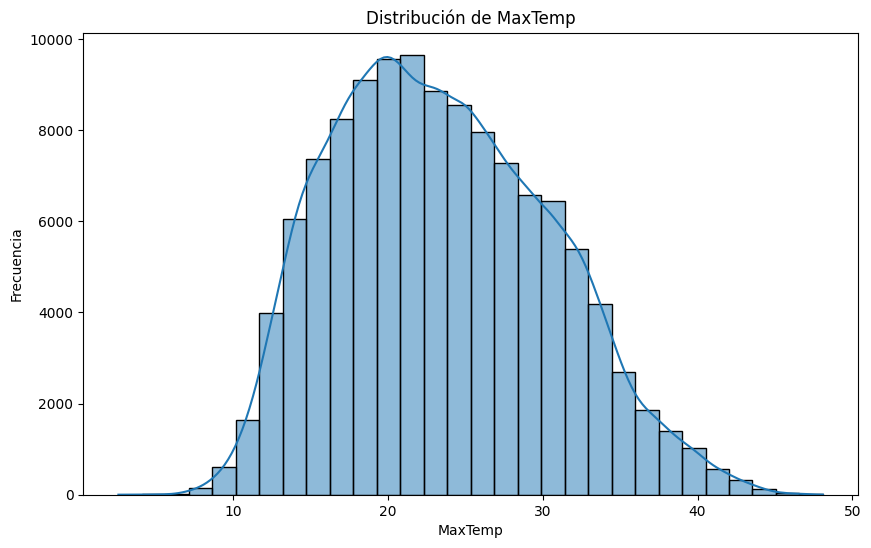

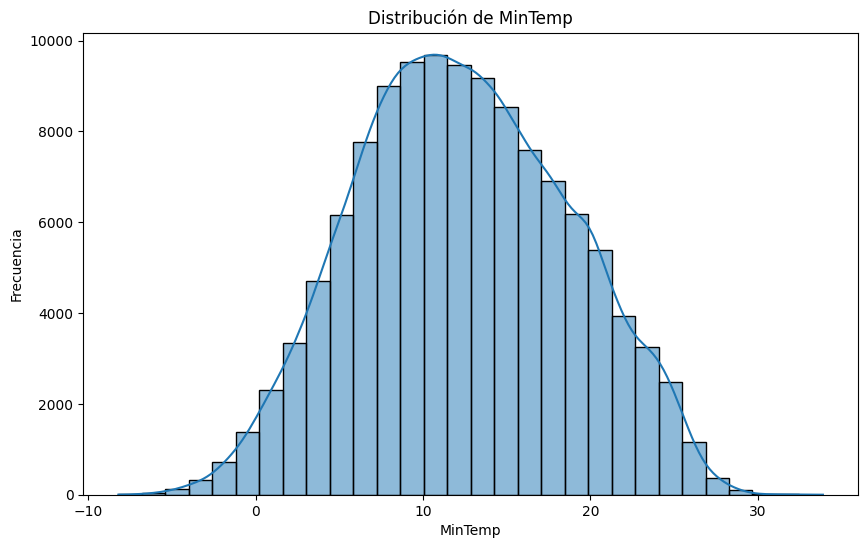

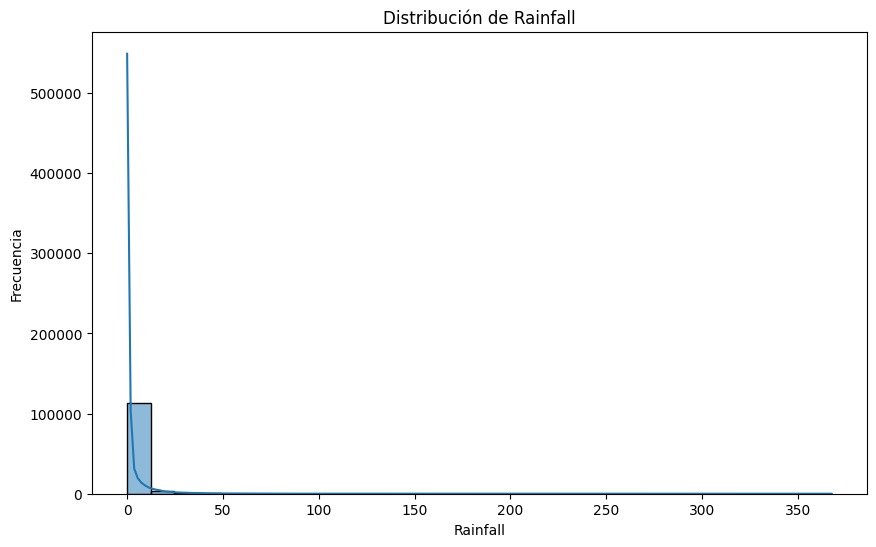

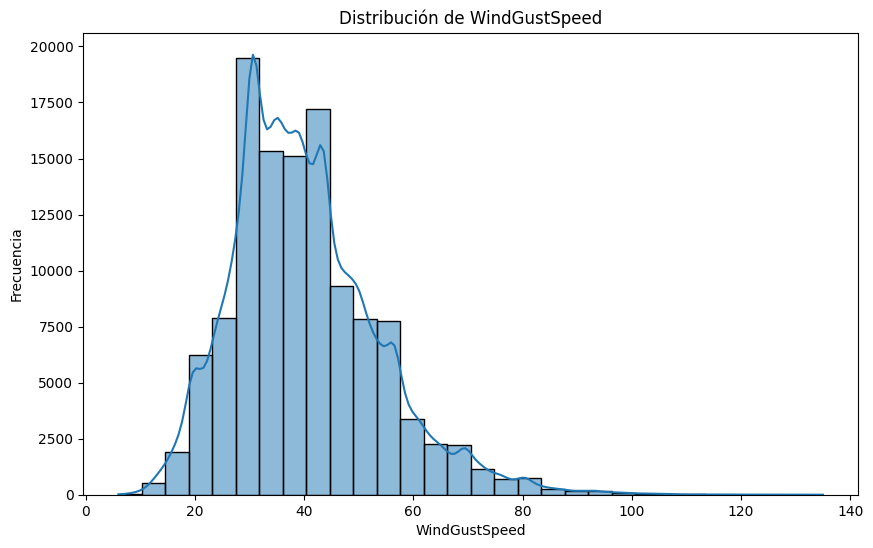

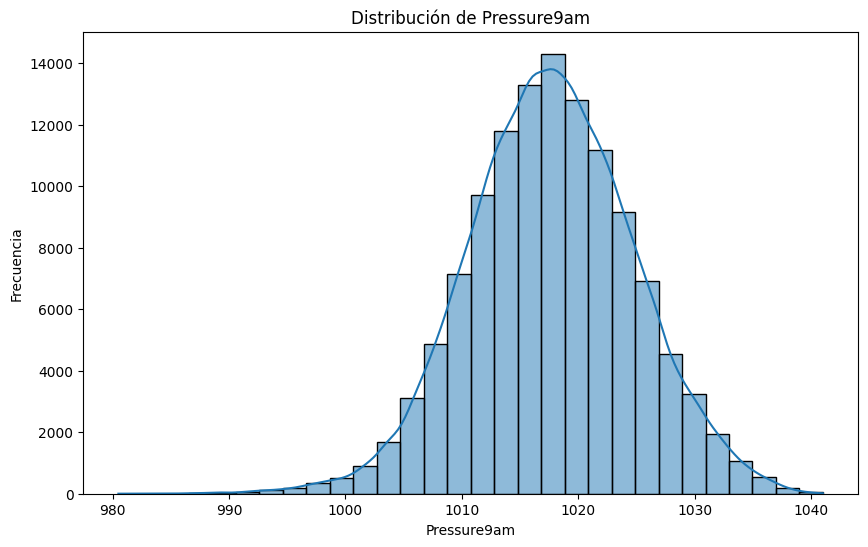

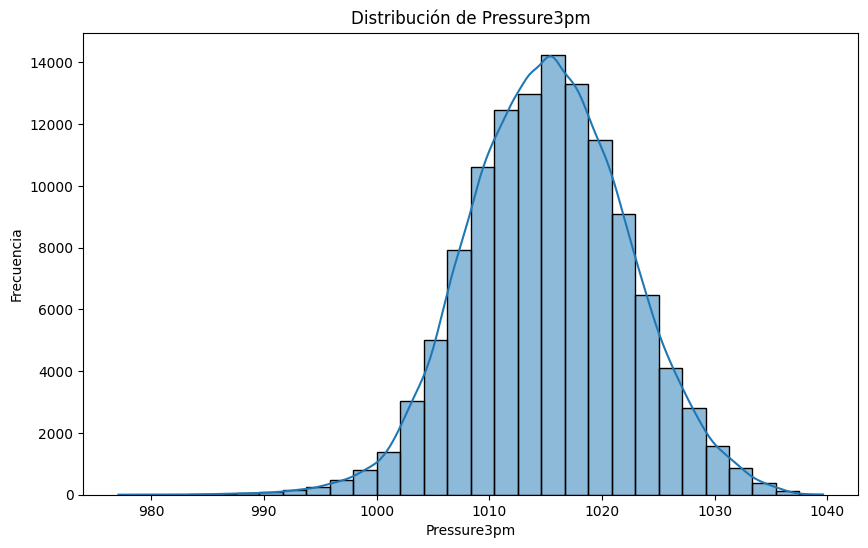

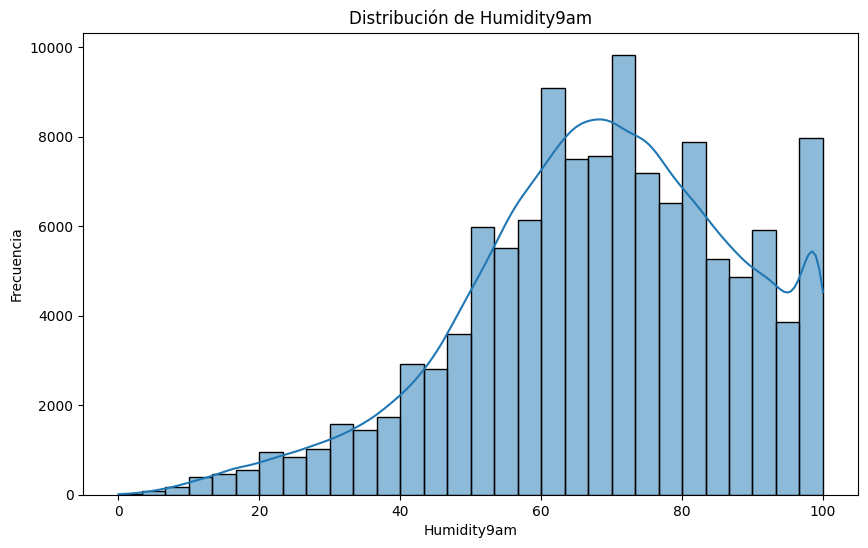

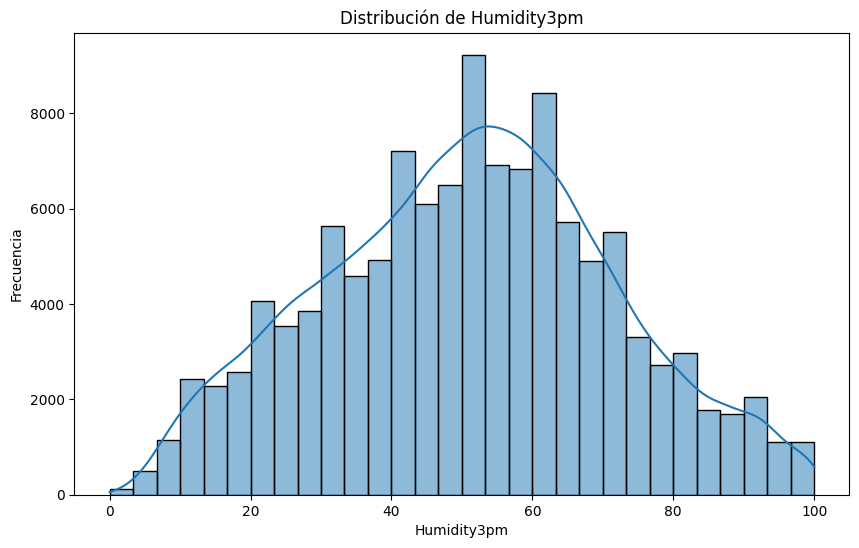

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/weatherAUS.csv'
df = pd.read_csv(file_path)

# Preprocesamiento de datos
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['MaxTemp', 'MinTemp', 'Rainfall', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm'])

# Variables numéricas a analizar
numeric_columns = ['MaxTemp', 'MinTemp', 'Rainfall', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm']

# Crear histogramas
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


Relación con el Negocio
Distribución de Temperaturas:

Insight: La distribución de las temperaturas máximas y mínimas muestra que la mayoría de los días tienen temperaturas moderadas, pero hay algunos días con temperaturas extremas.
Acción: Durante los días con temperaturas extremas, se pueden lanzar campañas específicas para productos que ayudan a combatir el calor o el frío, como bebidas refrescantes o calentadores.
Precipitación:

Insight: La precipitación es baja en la mayoría de los días, pero hay eventos de lluvia intensa.
Acción: Preparar inventario y logística para días lluviosos, ofreciendo productos impermeables y servicios de entrega especiales.
Insights Accionables
A continuación se presentan algunos insights específicos y las acciones recomendadas:

Insight 1: Alta Correlación entre Temperatura y Humedad

Descripción: Se observa una alta correlación negativa entre las temperaturas a las 3pm y la humedad a las 3pm.
Acción: Durante los días calurosos, promover productos que ayuden a mantener la hidratación y la frescura.
Insight 2: Variabilidad en la Velocidad del Viento

Descripción: La velocidad del viento muestra variabilidad significativa, lo que puede afectar actividades al aire libre.
Acción: Planificar eventos y actividades al aire libre considerando las predicciones de velocidad del viento.
Insight 3: Patrones de Lluvia y Eventos Extremos

Descripción: Los eventos de lluvia intensa son menos frecuentes pero significativos.
Acción: Desarrollar estrategias de marketing y logística para los días de lluvia intensa, ofreciendo servicios de entrega rápida y productos impermeables.

## Propuestas de Soluciones e Ideas Prácticas

### Optimización de Inventario
**Insight**: Se ha observado una variabilidad significativa en las temperaturas y la humedad.  
**Recomendación**: Ajustar el inventario de productos según las predicciones climáticas. Por ejemplo, durante los períodos de altas temperaturas, aumentar el stock de productos como bebidas refrescantes, ventiladores y ropa ligera.

### Marketing Dirigido
**Insight**: La precipitación y la temperatura tienen un impacto considerable en el comportamiento del consumidor.  
**Recomendación**: Desarrollar campañas de marketing específicas para diferentes condiciones climáticas. Por ejemplo, durante días lluviosos, promover productos impermeables y servicios de entrega rápida.

### Planificación de Eventos
**Insight**: La velocidad del viento y la precipitación afectan las actividades al aire libre.  
**Recomendación**: Utilizar las predicciones climáticas para planificar eventos al aire libre. Evitar programar actividades en días con alta velocidad de viento o lluvia intensa.

### Estrategias de Logística
**Insight**: Los eventos climáticos extremos son menos frecuentes pero tienen un gran impacto.  
**Recomendación**: Implementar planes de contingencia para la logística durante eventos climáticos extremos. Asegurar que haya suficiente personal y recursos para manejar incrementos en la demanda de servicios de entrega durante estos períodos.

### Monitoreo y Adaptación en Tiempo Real
**Insight**: Las condiciones climáticas pueden cambiar rápidamente y afectar las operaciones diarias.  
**Recomendación**: Implementar sistemas de monitoreo en tiempo real para adaptar rápidamente las operaciones y estrategias comerciales en función de las condiciones climáticas actuales.
